### Loading necessary library

In [66]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from collections import Counter
from math import exp

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.regularizers import l2

### Loading dataset

In [2]:
with open('/content/drive/My Drive/Colab Folder/data.json', encoding='utf-8') as fh:
    data = json.load(fh)

In [32]:
data[0]

{'author': 'গাজীপুর প্রতিনিধি',
 'category': 'bangladesh',
 'category_bn': 'বাংলাদেশ',
 'comment_count': 0,
 'content': 'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্য

In [33]:
length_dataset  = len(data)
length_dataset

437948

In [34]:
# unique categories
unique_category = set([cat['category'] for cat in data])
unique_category

{'-1',
 '22221',
 'AskEditor',
 'bangladesh',
 'bondhushava',
 'bs-events',
 'chakri-bakri',
 'demo-content',
 'diverse',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'events',
 'facebook',
 'international',
 'kishoralo',
 'life-style',
 'mpaward1',
 'nagorik-kantho',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'protichinta',
 'roshalo',
 'special-supplement',
 'sports',
 'tarunno',
 'technology',
 'trust',
 'we-are'}

In [35]:
# Length of unique category
len(unique_category)

32

In [36]:
all_cat= [cat['category'] for cat in data] 
len(all_cat)

437948

In [37]:
# Total number of each unique category
number_unique_cat = []
for u_cat in unique_category:
  number_unique_cat.append(all_cat.count(u_cat))

sorted(number_unique_cat)[::-1]

[232504,
 49012,
 30856,
 30466,
 17245,
 15699,
 12116,
 10852,
 9721,
 7402,
 6990,
 3443,
 2999,
 2702,
 2604,
 990,
 859,
 508,
 443,
 170,
 123,
 83,
 75,
 40,
 17,
 11,
 10,
 2,
 2,
 2,
 1,
 1]

### Zipping and taking necessary class

In [38]:
zipping = zip(number_unique_cat, unique_category)
zipping = list(zipping)
zipping

[(75, 'chakri-bakri'),
 (2, 'diverse'),
 (10852, 'life-style'),
 (10, 'facebook'),
 (11, '22221'),
 (49012, 'sports'),
 (12116, 'technology'),
 (17245, 'economy'),
 (2702, 'onnoalo'),
 (2, 'events'),
 (9721, 'education'),
 (15699, 'opinion'),
 (17, 'mpaward1'),
 (7402, 'durporobash'),
 (232504, 'bangladesh'),
 (443, 'trust'),
 (2, 'demo-content'),
 (2604, 'roshalo'),
 (40, 'tarunno'),
 (859, 'special-supplement'),
 (123, '-1'),
 (6990, 'northamerica'),
 (1, 'bs-events'),
 (30466, 'entertainment'),
 (30856, 'international'),
 (3443, 'pachmisheli'),
 (508, 'kishoralo'),
 (2999, 'we-are'),
 (83, 'nagorik-kantho'),
 (990, 'bondhushava'),
 (1, 'AskEditor'),
 (170, 'protichinta')]

In [39]:
selected_category = []
for z in zipping:
  if z[0] > 10000:
    selected_category.append(z[1])

selected_category

['life-style',
 'sports',
 'technology',
 'economy',
 'opinion',
 'bangladesh',
 'entertainment',
 'international']

### Feature and Label data

In [40]:
X_feature = []
y_label = []

for p in data:
  if p['category'] in selected_category:
    X_feature.append(p['content'])
    y_label.append(p['category'])

In [41]:
print(f"Shape of X_feature is {len(X_feature)} and Shape of y_label is {len(y_label)}")

Shape of X_feature is 398750 and Shape of y_label is 398750


### Some feature and label data

In [42]:
for txt in range(5):
  print(X_feature[txt])

গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে।

In [43]:
for l in range(5):
  print(y_label[l])

bangladesh
sports
bangladesh
technology
technology


### Label Encoding

In [44]:
encoder = LabelEncoder()
class_labels = encoder.fit_transform(y_label)

In [45]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [46]:
l = len(class_labels)
l

398750

### One Hot Encoding

In [47]:
ohe = OneHotEncoder(sparse=False) 
class_labels = class_labels.reshape((class_labels.shape[0], 1))
y_ohe = ohe.fit_transform(class_labels)

In [48]:
y_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Tokenizing

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_feature)
X_token = tokenizer.texts_to_sequences(X_feature)

In [50]:
vocab_size = len(tokenizer.word_index) + 1 
vocab_size

2274228

### Some feature and token

In [51]:
for txt_tkn in range(2):
  print(X_feature[txt_tkn])
  print(X_token[txt_tkn])

গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে।

### Pad Sequence

In [52]:
max_len = 300
X_pad = pad_sequences(X_token, padding='post', maxlen=max_len)

### Most common word

In [ ]:
word_list = []
for sen in X_feature:
  word_list.extend(sen.split())

len(word_list)  

In [ ]:
counter = Counter(word_list)
most_common = counter.most_common(100) 
print(most_common)

### Class weight

In [ ]:
class_list = list(class_labels[:, 0])
class_list_set = set(class_list)
class_list_set

In [ ]:
class_weight = {}

for c in (list(class_list_set)):
  print(c)
  c_w = len(class_labels)/ np.sum(class_labels==c) 
  print(c_w)
  class_weight[c] = c_w 

### Dividing dataset

In [53]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
sss.get_n_splits(X_pad, y_ohe)

for train_index, test_index in sss.split(X_pad, y_ohe):
  X_train, X_test = X_pad[train_index], X_pad[test_index]
  y_train, y_test = y_ohe[train_index], y_ohe[test_index] 

### Model

In [54]:
embedding_dim = 8

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(128))) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 8)            18193824  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300, 256)          140288    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
Total params: 18,730,408
Trainable params: 18,730,408
Non-trainable params: 0
_________________________________________________________________


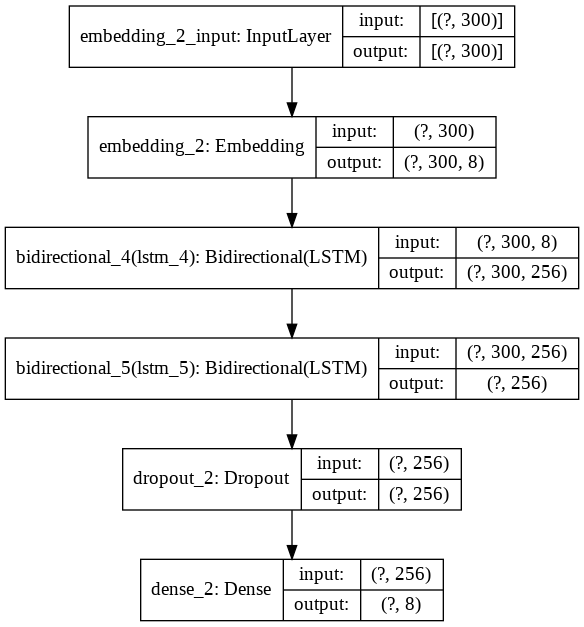

In [56]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'Bengali_Sentiment_model.png')

In [57]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * exp(-k*epoch)
    return lrate
lrate = LearningRateScheduler(exp_decay)

In [58]:
model_fit = model.fit(X_train, y_train,
                    epochs = 10,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=256,
                    #class_weight=class_weight
                    )

Epoch 1/10
873/873 [==============================] - 274s 314ms/step - loss: 0.6713 - accuracy: 0.7812 - val_loss: 0.4602 - val_accuracy: 0.8541
Epoch 2/10
873/873 [==============================] - 274s 314ms/step - loss: 0.4104 - accuracy: 0.8709 - val_loss: 0.3493 - val_accuracy: 0.8879
Epoch 3/10
873/873 [==============================] - 273s 313ms/step - loss: 0.2005 - accuracy: 0.9394 - val_loss: 0.2605 - val_accuracy: 0.9202
Epoch 4/10
873/873 [==============================] - 274s 314ms/step - loss: 0.1143 - accuracy: 0.9666 - val_loss: 0.2881 - val_accuracy: 0.9204
Epoch 5/10
873/873 [==============================] - 273s 313ms/step - loss: 0.0632 - accuracy: 0.9822 - val_loss: 0.2781 - val_accuracy: 0.9222
Epoch 6/10
873/873 [==============================] - 273s 313ms/step - loss: 0.0449 - accuracy: 0.9877 - val_loss: 0.3279 - val_accuracy: 0.9157
Epoch 7/10
873/873 [==============================] - 273s 313ms/step - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.3331 -

### Accuracy and Loss graph

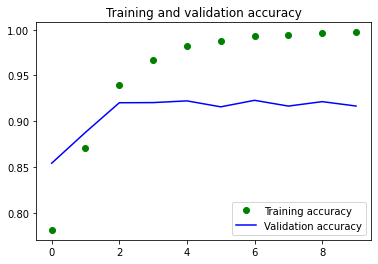

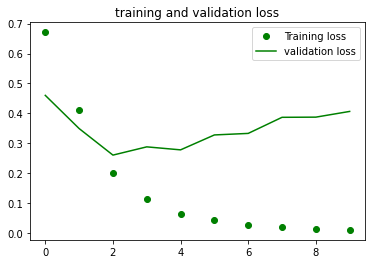

In [59]:
train_accuracy = model_fit.history['accuracy'] 
loss = model_fit.history['loss']

val_accuracy = model_fit.history['val_accuracy']
val_loss = model_fit.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, train_accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

### Predict with test data

In [60]:
pred_class = encoder.inverse_transform(model.predict_classes(X_test))
pred_class

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['bangladesh', 'sports', 'bangladesh', ..., 'bangladesh',
       'bangladesh', 'sports'], dtype='<U13')

In [61]:
len(pred_class)

119625

### Confusion Matrix

In [62]:
oh_encod_inverse = ohe.inverse_transform(y_test)
label_encode_inverse = encoder.inverse_transform(oh_encod_inverse)
label_encode_inverse

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['bangladesh', 'sports', 'bangladesh', ..., 'bangladesh',
       'bangladesh', 'sports'], dtype='<U13')

Text(56.760000000000005, 0.5, 'Predicted data')

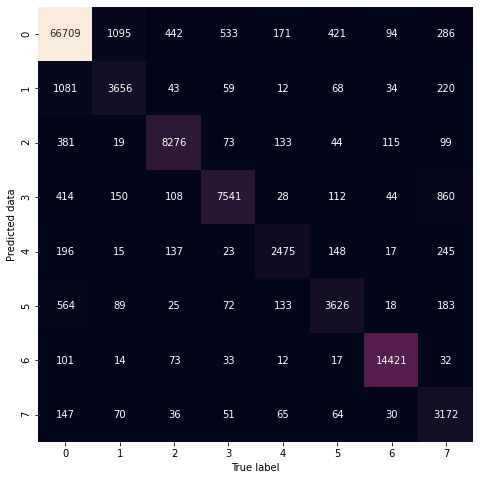

In [72]:
#finally printing
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(label_encode_inverse, pred_class), square=True, annot=True, fmt='d', cbar=False,
           #xticklabels=digits.target_names,
           #yticklabels=digits.target_names
           )

plt.xlabel('True label')
plt.ylabel('Predicted data')

### Save Model

In [68]:
model.save('BNC_lstm.h5')

In [69]:
model = load_model('BNC_lstm.h5')

### Predicting with new data

In [70]:
def generate_response():
    max_len=15
    input_sentence = input('Enter input news: ')
    Xi_token = tokenizer.texts_to_sequences([input_sentence])
    Xi_pad = pad_sequences(Xi_token, padding='post', maxlen=max_len)
    print('Model predicts')
    preds = model.predict(Xi_pad)
    print('Confidence :') 
    print(preds)
    preds = preds
    total = 0
    for k in range(len(preds[0])):
        print(encoder.inverse_transform([[k]]))
        print('%f %%' %(preds[0,k]*100))
        total += preds[0,k]*100
    #print(total)
    print('Predicted class: %s'%(encoder.inverse_transform(model.predict_classes(Xi_pad))))

In [71]:
generate_response()

Enter input news:  অ মাই গড বাংলাদেশ আমার কত সুন্দর 
Model predicts
Confidence :
[[4.3584475e-01 3.0864722e-03 1.5861140e-01 3.6833840e-04 2.6445732e-01
  8.6270615e-02 4.9457200e-02 1.9038793e-03]]
['bangladesh']
43.584475 %
['economy']
0.308647 %
['entertainment']
15.861140 %
['international']
0.036834 %
['life-style']
26.445732 %
['opinion']
8.627062 %
['sports']
4.945720 %
['technology']
0.190388 %
Predicted class: ['bangladesh']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
